# 1. Importing Libraries

In [1]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import pandas as pd
from numpy import linspace
from scipy.stats.kde import gaussian_kde
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import output_file, show,curdoc
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter, Slider, CustomJS
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly
from bokeh.models.widgets import Select
from bokeh.layouts import row,widgetbox
import colorcet as cc


# 2. Preprocessing Data

In [2]:
origi = pd.read_csv('bank-full.csv',sep = ";")

data2 = pd.read_csv('bank-full.csv',sep = ";")
data = pd.read_csv('bank-full.csv',sep = ";")
del data["pdays"]

origi.dtypes


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


# Checking for null values

In [6]:
obj_df[obj_df.isnull().any(axis=1)]

#obj_df["num_doors"].value_counts()
#obj_df = obj_df.fillna({"num_doors": "four"})

,job,marital,education,default,housing,loan,contact,month,poutcome,y


In [7]:

origi_new = pd.get_dummies(origi, columns=["loan","marital","default","job","education","poutcome","housing","contact","month"])
origi_new['y'] = origi['y'].map({'yes': 1 ,'no': 0 })

origi_new.head()

,age,balance,day,duration,campaign,pdays,previous,y,loan_no,loan_yes,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
data['loan'] = data['loan'].map({'yes': 1 ,'no': 0 })
data['marital'] = data['marital'].map({'married':0 ,'divorced': 1, 'single':2 })
data['default'] = data['default'].map({'yes':1,'no':0})
data['job'] = data['job'].map({'admin.': 1, 'unknown': 0, 'unemployed':2,'management':3,'housemaid':4,'entrepreneur':5,'student':6,'blue-collar':7,'self-employed':8,'retired':9,'technician':10,'services':11})
data['education'] = data['education'].map({'unknown': 0 ,'secondary': 1,'primary':2, 'tertiary': 3})
data['poutcome'] = data['poutcome'].map({'unknown': 0 ,'other': 1,'failure':2, 'success': 3})
data['housing'] = data['housing'].map({'yes': 1 ,'no': 0 })
data['contact'] = data['contact'].map({'unknown': 0 ,'telephone': 1, 'cellular':2 })
data['month'] = data['month'].map({'jan': 0 ,'feb': 1,'mar': 2,'apr': 3,'may': 4,'jun': 5,'jul': 6,'aug': 7,'sep': 8,'oct': 9,'nov': 10,'dec':11 })
data['y'] = data['y'].map({'yes': 1 ,'no': 0 })
data2['loan'] = data2['loan'].map({'yes': 1 ,'no': 0 })
data2['marital'] = data2['marital'].map({'married':0 ,'divorced': 1, 'single':2 })
data2['default'] = data2['default'].map({'yes':1,'no':0})
data2['job'] = data2['job'].map({'admin.': 1, 'unknown': 0, 'unemployed':2,'management':3,'housemaid':4,'entrepreneur':5,'student':6,'blue-collar':7,'self-employed':8,'retired':9,'technician':10,'services':11})
data2['education'] = data2['education'].map({'unknown': 0 ,'secondary': 1,'primary':2, 'tertiary': 3})
data2['poutcome'] = data2['poutcome'].map({'unknown': 0 ,'other': 1,'failure':2, 'success': 3})
data2['housing'] = data2['housing'].map({'yes': 1 ,'no': 0 })
data2['contact'] = data2['contact'].map({'unknown': 0 ,'telephone': 1, 'cellular':2 })
data2['month'] = data2['month'].map({'jan': 0 ,'feb': 1,'mar': 2,'apr': 3,'may': 4,'jun': 5,'jul': 6,'aug': 7,'sep': 8,'oct': 9,'nov': 10,'dec':11 })
data2['y'] = data2['y'].map({'yes': 1 ,'no': 0 })


#data['age'] = data['age'].map({0 <= 'age' < 10: 0, 10 <= 'age' < 20: 1, 20 <= 'age' < 30: 2, 30 <= 'age' < 40: 3, 40 <= 'age' < 50: 4,50 <= 'age' < 60: 5, 60 <= 'age' < 70: 6, 70 <= 'age' < 80: 7, 80 <= 'age' < 90: 8, 90 <= 'age' < 100: 9})

array = data.values


    
X = array[:,0:14]
Y = array[:,14]


X=X.astype('int')
Y=Y.astype('int')

data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,3,0,3,0,2143,1,0,0,5,4,261,1,0,0,0
1,44,10,2,1,0,29,1,0,0,5,4,151,1,0,0,0
2,33,5,0,1,0,2,1,1,0,5,4,76,1,0,0,0
3,47,7,0,0,0,1506,1,0,0,5,4,92,1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,4,198,1,0,0,0


# 3. Loading Models

In [6]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(max_depth=2)))
models.append(('NB', GaussianNB()))
models.append(('MPL', MLPClassifier(alpha=0.7)))
#models.append(('GPC', GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),optimizer=None)))
models.append(('RFC', RandomForestClassifier(max_depth=10, n_estimators=10, max_features=2)))
models.append(('ABC', AdaBoostClassifier()))
models.append(('SVM', LinearSVC(random_state=0)))

# 4. Computing Accuracy

In [7]:
seed = 7
results = []
names = []
scoring = 'accuracy'
maxv = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    if cv_results.mean() > maxv:
        maxv = cv_results.mean()
        algo = name
    results.append(cv_results)
    
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

print algo    

LR: 0.920947 (0.108597)


/home/kaushik/venv/local/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.847866 (0.179146)
KNN: 0.804867 (0.199860)
CART: 0.925724 (0.105806)
NB: 0.909931 (0.105749)
MPL: 0.864433 (0.150886)
RFC: 0.913050 (0.126698)
ABC: 0.898783 (0.120183)
SVM: 0.713427 (0.292331)
CART


# 5. Visualizing Accuracy

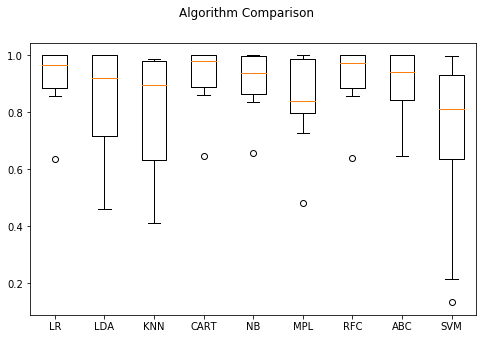

In [9]:
fig = plt.figure(figsize=(8,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 6. Statistical and Visual Analysis

In [34]:
origi.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

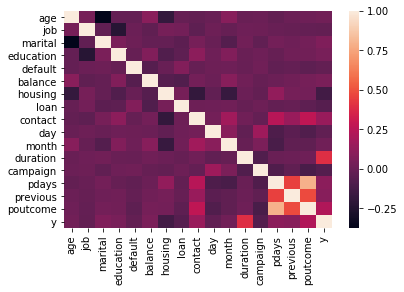

In [11]:
corr = data2.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [36]:
data1 = data2
data1.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,6.126164,0.680963,1.698856,0.018027,1362.272058,0.555838,0.160226,1.359758,15.806419,5.144655,258.163080,2.763841,40.197828,0.580323,0.357767,0.116985
std,10.618762,3.369084,0.884908,0.938627,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.804435,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,0.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,4.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,7.000000,0.000000,1.000000,0.000000,448.000000,1.000000,0.000000,2.000000,16.000000,5.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,10.000000,2.000000,3.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,7.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [37]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

# 6a. AGE VS O/P

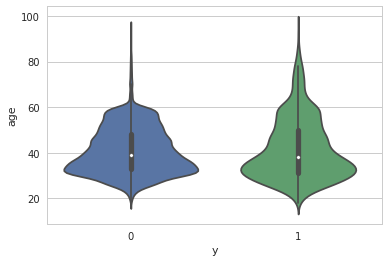

In [25]:
sns.violinplot(x="y", y="age",data=data1,jitter = True)
output_file("joyplot.html")

In [14]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["age"])
my_tab.index = ["unsubscibed","subscibed"]
#my_tab.columns = ["no-house","yes-house"]
print my_tab



age          18  19  20  21  22   23   24   25   26   27 ...  85  86  87  88  \
unsubscibed   5  24  35  57  89  158  234  414  671  768 ...   1   5   1   2   
subscibed     7  11  15  22  40   44   68  113  134  141 ...   4   4   3   0   

age          89  90  92  93  94  95  
unsubscibed   3   0   0   0   1   1  
subscibed     0   2   2   2   0   1  

[2 rows x 77 columns]


### Insight : more number of (20-60) age group people are unsubscribing

# 6b. JOB VS O/P

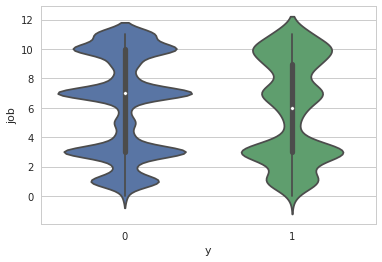

In [15]:
sns.violinplot(x="y", y="job",data=data1,jitter = True)

In [16]:
def insight(my_tab):    
    leng = len(my_tab.columns)
    print my_tab
    print "\n \n"
    maxv = 0
    index = 0
    for i in range(leng):
        temp = my_tab[my_tab.columns[i]]
        temp1 =  (temp["unsubscribed"]  / ( (temp["subscribed"] + temp["unsubscribed"]) * 1.0 ) ) * 100
        if temp1 > maxv:
            index = i
            maxv = temp1
        print my_tab.columns[i],"    ->    ",temp1
    print "\n\n"

    print my_tab.columns[index],maxv


In [17]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["job"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['unknown', 'admin.', 'unemployed','management','housemaid','entrepreneur','student','blue-collar','self-employed','retired','technician','services']
insight (my_tab)

              unknown  admin.  unemployed  management  housemaid  \
unsubscribed      254    4540        1101        8157       1131   
subscribed         34     631         202        1301        109   

              entrepreneur  student  blue-collar  self-employed  retired  \
unsubscribed          1364      669         9024           1392     1748   
subscribed             123      269          708            187      516   

              technician  services  
unsubscribed        6757      3785  
subscribed           840       369  

 

unknown     ->     88.19444444444444
admin.     ->     87.79733127054729
unemployed     ->     84.49731389102072
management     ->     86.24444914358216
housemaid     ->     91.20967741935485
entrepreneur     ->     91.72831203765972
student     ->     71.32196162046908
blue-collar     ->     92.72503082614057
self-employed     ->     88.15706143128563
retired     ->     77.20848056537103
technician     ->     88.9430038172963
services     ->     

### Insight : More number of blue-collar job people are unsubscibing

# 6c. CREDIT VS O/P

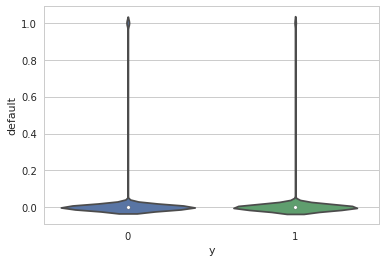

In [27]:
sns.violinplot(y="default", x="y",data=data1,jitter = True)

In [17]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["contact"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['no-credit card','has credit card']
insight (my_tab)

              no-credit card  has credit card
unsubscribed           39159              763
subscribed              5237               52

 

no-credit card     ->     88.20389224254437
has credit card     ->     93.61963190184049



has credit card 93.61963190184049


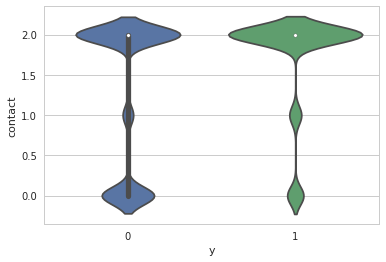

In [26]:

sns.violinplot(y="contact", x="y",data=data1,jitter = True)

# 6d. EDUCATION VS O/P

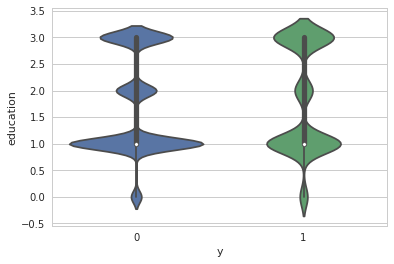

In [20]:
sns.violinplot(x="y", y="education",data=data1,jitter = True)

In [21]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["education"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['unknown','secondary','primary', 'tertiary']
insight(my_tab)

              unknown  secondary  primary  tertiary
unsubscribed     1605      20752     6260     11305
subscribed        252       2450      591      1996

 

unknown     ->     86.4297253634895
secondary     ->     89.4405654684941
primary     ->     91.37352211356007
tertiary     ->     84.9936095030449



primary 91.37352211356007


# 6e. Loan VS O/P

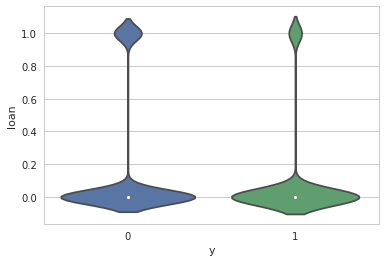

In [183]:
sns.violinplot(y="loan", x="y",data=data1,jitter = True)

In [22]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["loan"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['no-loan','has loan']
insight(my_tab)

              no-loan  has loan
unsubscribed    33162      6760
subscribed       4805       484

 

no-loan     ->     87.34427265783444
has loan     ->     93.31860850358918



has loan 93.31860850358918


# 6f. MARITAL VS O/P

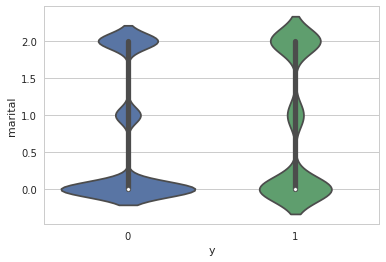

In [23]:
sns.violinplot(y="marital", x="y",data=data1,jitter = True)

In [24]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["marital"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['married','divorsed','single']
insight(my_tab)

              married  divorsed  single
unsubscribed    24459      4585   10878
subscribed       2755       622    1912

 

married     ->     89.87653413684133
divorsed     ->     88.05454196274246
single     ->     85.05082095387021



married 89.87653413684133


# 6f. HOUSING VS O/P

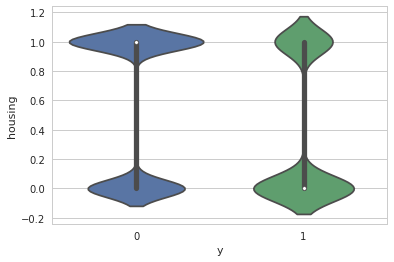

In [25]:
sns.violinplot(y="housing", x="y",data=data1,jitter = True)

In [26]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["housing"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['no-house','has house']
insight(my_tab)

              no-house  has house
unsubscribed     16727      23195
subscribed        3354       1935

 

no-house     ->     83.29764453961455
has house     ->     92.30003979307601



has house 92.30003979307601


In [189]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["marital"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['married','divorsed','single']
insight(my_tab)

              married  divorsed  single
unsubscribed    24459      4585   10878
subscribed       2755       622    1912

 

married     ->     89.87653413684133
divorsed     ->     88.05454196274246
single     ->     85.05082095387021



married 89.87653413684133


# 6g. BALENCE VS O/P

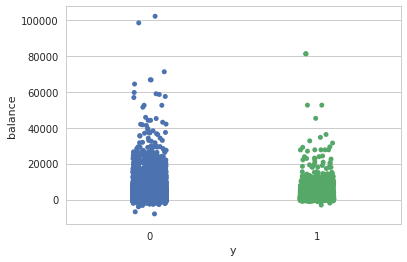

In [27]:
sns.stripplot(y="balance", x="y",data=data1,jitter = True)

# 6h. CONTACT VS O/P

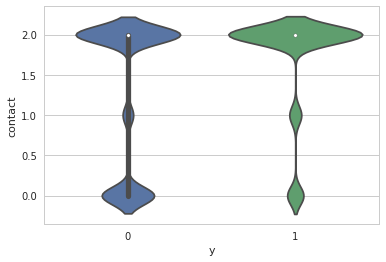

In [28]:
sns.violinplot(y="contact", x="y",data=data1,jitter = True)

In [29]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["contact"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ["unknown","telephone","cellular"]
insight(my_tab)

              unknown  telephone  cellular
unsubscribed    12490       2516     24916
subscribed        530        390      4369

 

unknown     ->     95.92933947772657
telephone     ->     86.57949070887818
cellular     ->     85.08109953901315



unknown 95.92933947772657


# 6i. DAY VS O/P

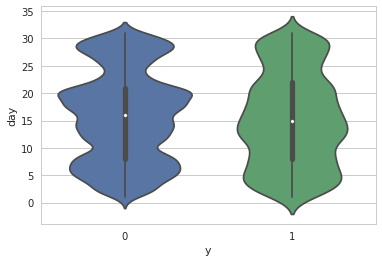

In [30]:
sns.violinplot(y="day", x="y",data=data1,jitter = True)

# 6j. MONTH VS O/P

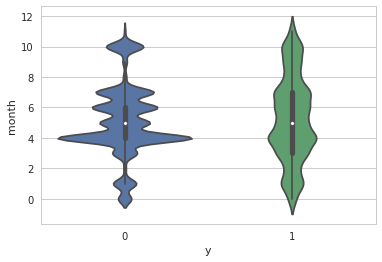

In [31]:
sns.violinplot(y="month", x="y",data=data1,jitter = True)

In [195]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["month"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
insight(my_tab)

               jan   feb  mar   apr    may   jun   jul   aug  sep  oct   nov  \
unsubscribed  1261  2208  229  2355  12841  4795  6268  5559  310  415  3567   
subscribed     142   441  248   577    925   546   627   688  269  323   403   

              dec  
unsubscribed  114  
subscribed    100  

 

jan     ->     89.87883107626514
feb     ->     83.35220838052095
mar     ->     48.0083857442348
apr     ->     80.3206002728513
may     ->     93.28054627342729
jun     ->     89.77719528178244
jul     ->     90.90645395213923
aug     ->     88.98671362253882
sep     ->     53.54058721934369
oct     ->     56.233062330623305
nov     ->     89.84886649874055
dec     ->     53.271028037383175



may 93.28054627342729


# 6k. Duration VS O/P

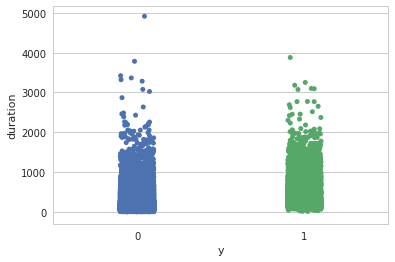

In [32]:
sns.stripplot(y="duration", x="y",data=data1,jitter = True)

# 6l. Campaign VS O/P

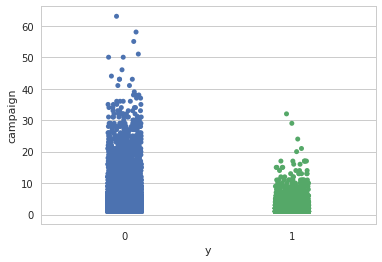

In [33]:
sns.stripplot(y="campaign", x="y",data=data1,jitter = True)

# 6m. PDAYS VS O/P

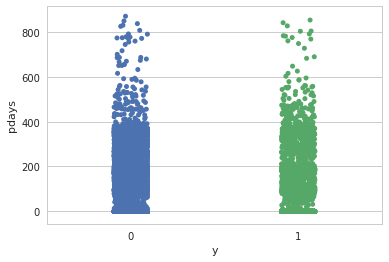

In [34]:
sns.stripplot(y="pdays", x="y",data=data1,jitter = True)

# 6n. Previous VS O/P

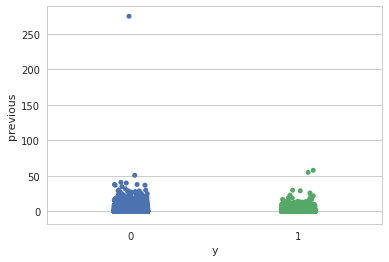

In [35]:
sns.stripplot(y="previous", x="y",data=data1,jitter = True)

# 6o. Poutcome VS O/P

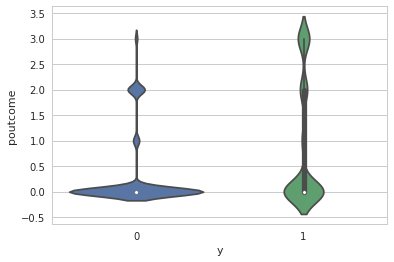

In [36]:
sns.violinplot(y="poutcome", x="y",data=data1,jitter = True)

In [18]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["poutcome"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ["unknown","other","failure","success"]
insight(my_tab)


my_tab = pd.crosstab(index=data1["y"], columns=data1["default"])
my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ["no","yes"]
insight(my_tab)

              unknown  other  failure  success
unsubscribed    33573   1533     4283      533
subscribed       3386    307      618      978

 

unknown     ->     90.83849671257339
other     ->     83.31521739130436
failure     ->     87.39032850438686
success     ->     35.27465254798147



unknown 90.83849671257339
                 no  yes
unsubscribed  39159  763
subscribed     5237   52

 

no     ->     88.20389224254437
yes     ->     93.61963190184049



yes 93.61963190184049


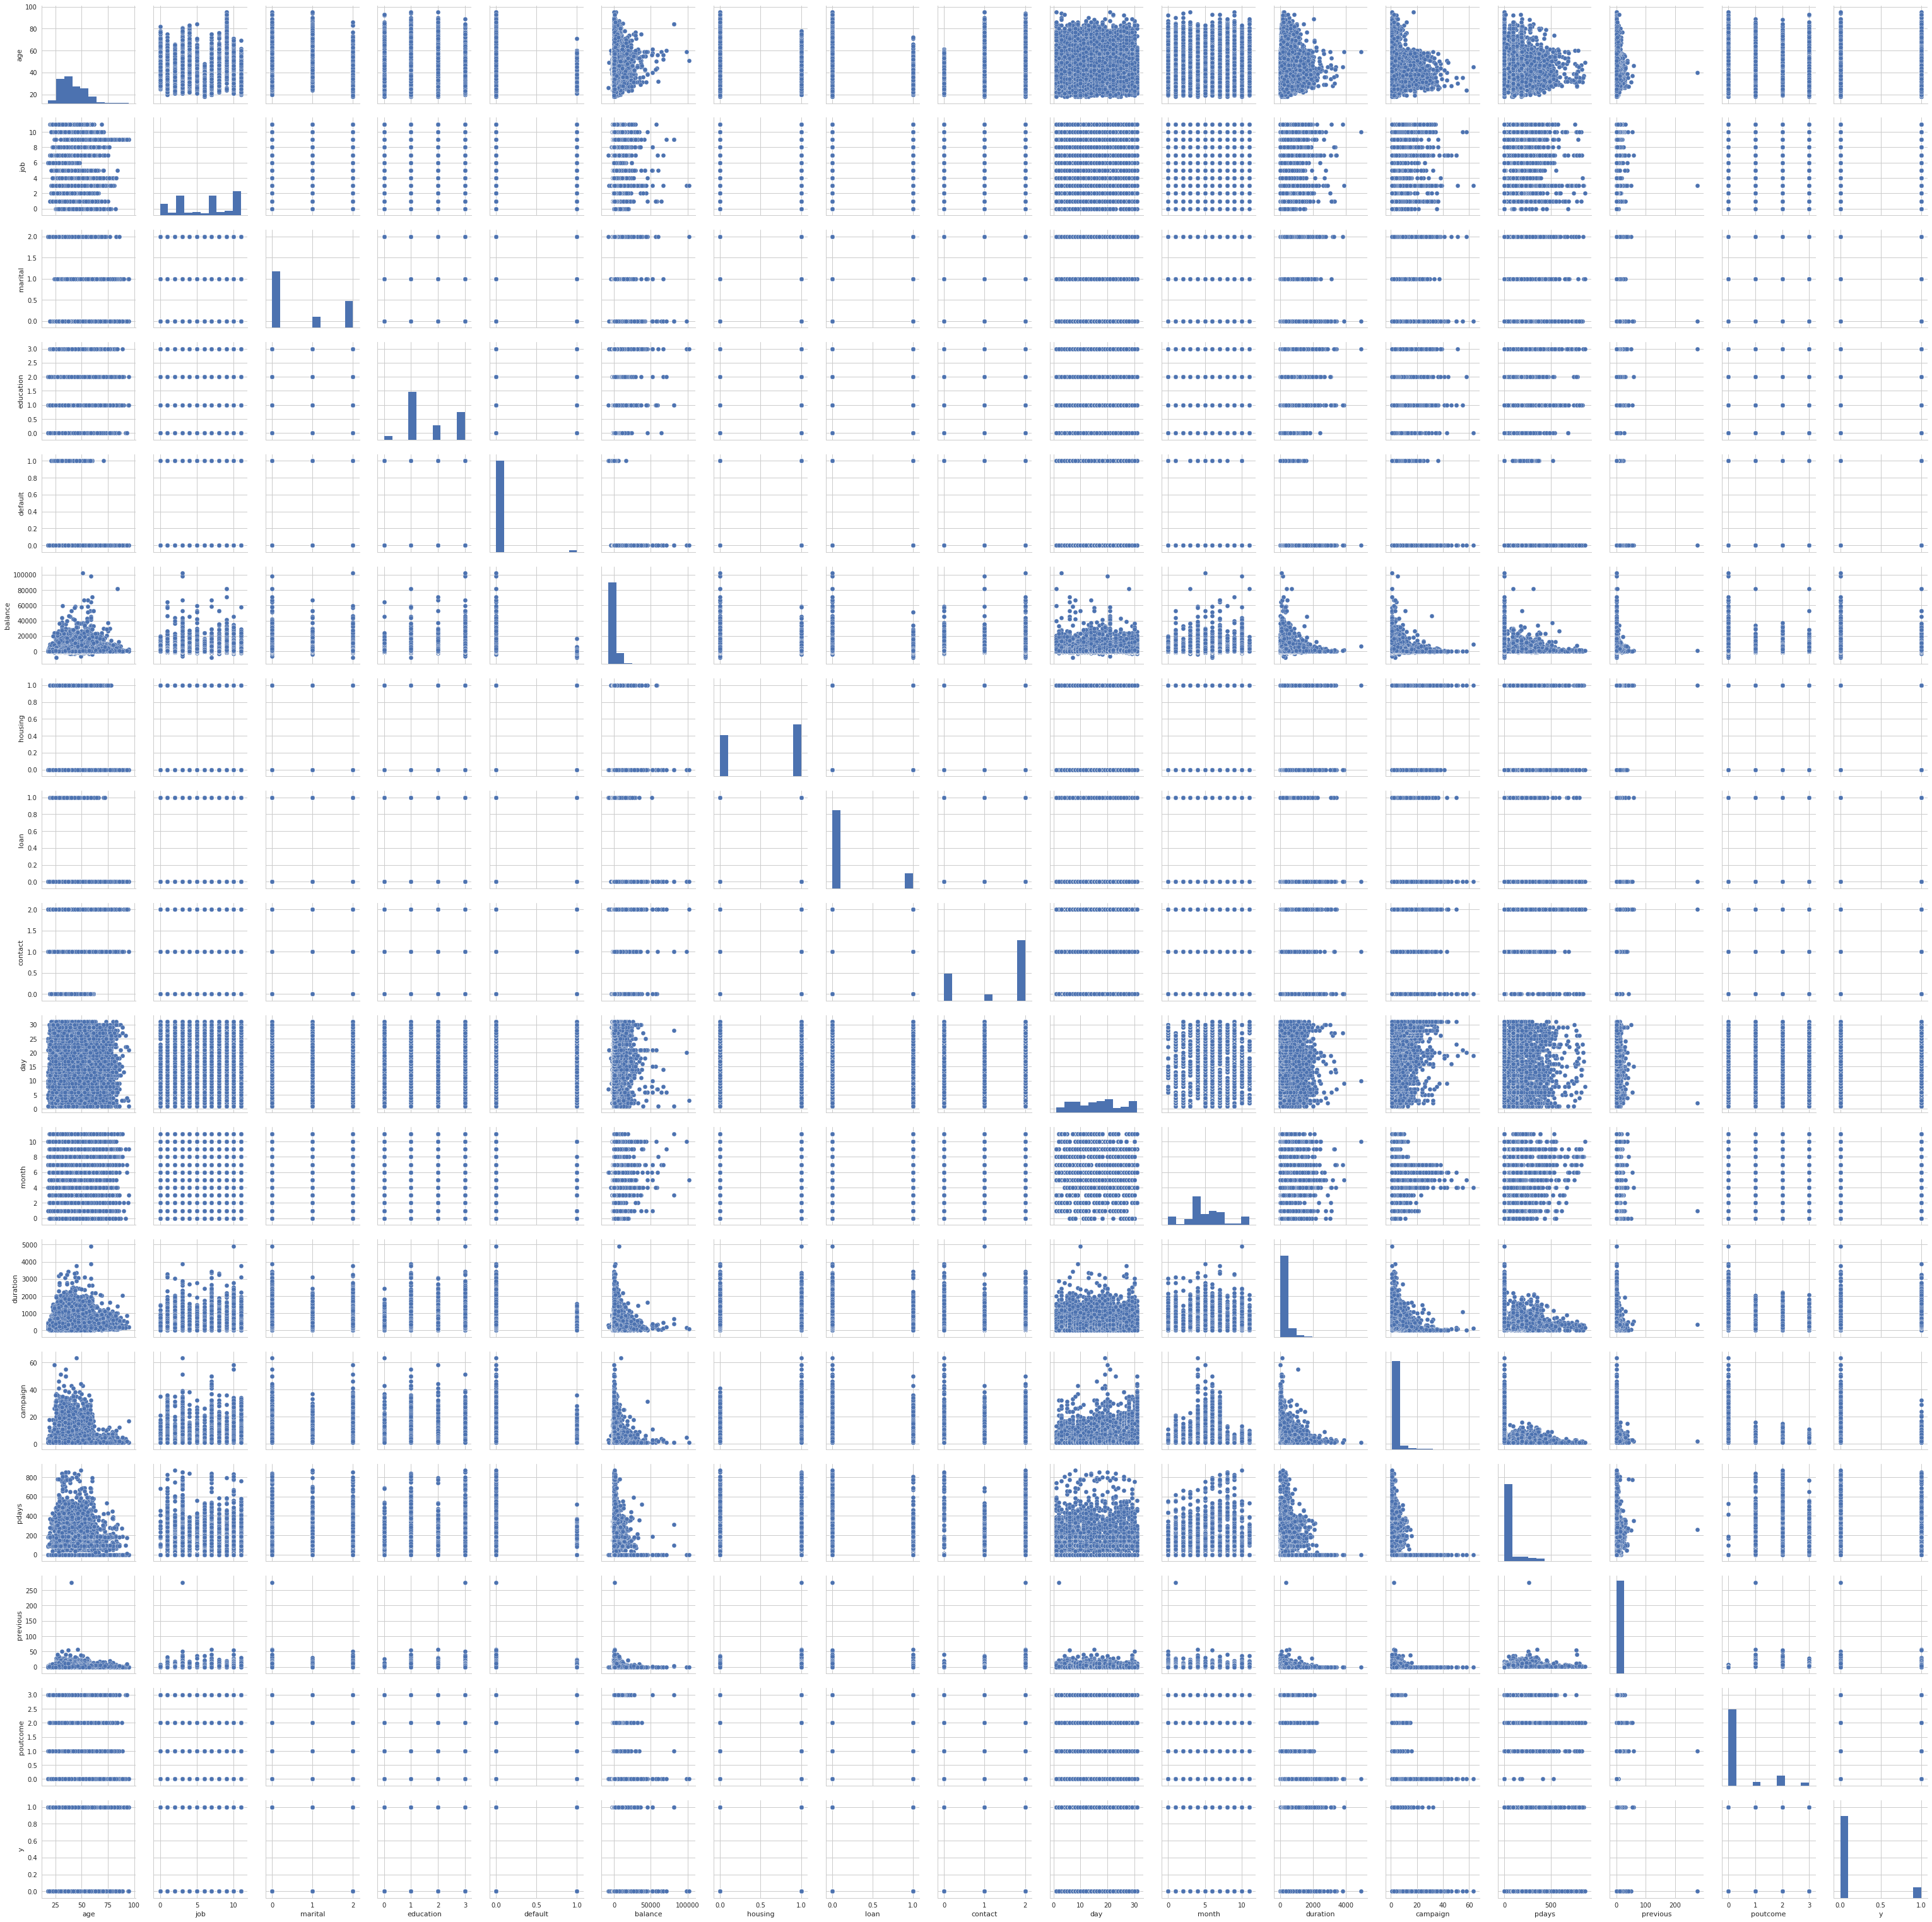

In [11]:
sns.pairplot(data1)

In [46]:
my_tab = pd.crosstab(index=data1["y"], columns=data1["housing"])

my_tab.index = ["unsubscribed","subscribed"]
my_tab.columns = ["no-house","yes-house"]
insight(my_tab)

              no-house  yes-house
unsubscribed     16727      23195
subscribed        3354       1935

 

no-house     ->     83.29764453961455
yes-house     ->     92.30003979307601



yes-house 92.30003979307601


In [47]:
my_tab = pd.crosstab(index=data1["y"], columns="count")

In [48]:
my_tab = pd.crosstab(index=data1["month"], columns="count")


In [49]:
my_tab = pd.crosstab(index=data1["marital"], columns="count")

print my_tab

col_0    count
marital       
0        27214
1         5207
2        12790


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import matplotlib as mpl


from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show,curdoc
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter, Slider, CustomJS
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly
from bokeh.models.widgets import Select
from bokeh.layouts import row,widgetbox
import colorcet as cc

data = pd.read_csv('bank-full.csv',sep = ";")

origi = data

data['loan'] = data['loan'].map({'yes': 1 ,'no': 0 })
data['marital'] = data['marital'].map({'married':0 ,'divorced': 1, 'single':2 })
data['default'] = data['default'].map({'yes':1,'no':0})
data['job'] = data['job'].map({'admin.': 1, 'unknown': 0, 'unemployed':2,'management':3,'housemaid':4,'entrepreneur':5,'student':6,'blue-collar':7,'self-employed':8,'retired':9,'technician':10,'services':11})
data['education'] = data['education'].map({'unknown': 0 ,'secondary': 1,'primary':2, 'tertiary': 3})
data['poutcome'] = data['poutcome'].map({'unknown': 0 ,'other': 1,'failure':2, 'success': 3})
data['housing'] = data['housing'].map({'yes': 1 ,'no': 0 })
data['contact'] = data['contact'].map({'unknown': 0 ,'telephone': 1, 'cellular':2 })
data['month'] = data['month'].map({'jan': 0 ,'feb': 1,'mar': 2,'apr': 3,'may': 4,'jun': 5,'jul': 6,'aug': 7,'sep': 8,'oct': 9,'nov': 10,'dec':11 })
data['y'] = data['y'].map({'yes': 1 ,'no': 0 })

#data['age'] = data['age'].map({0 <= 'age' < 10: 0, 10 <= 'age' < 20: 1, 20 <= 'age' < 30: 2, 30 <= 'age' < 40: 3, 40 <= 'age' < 50: 4,50 <= 'age' < 60: 5, 60 <= 'age' < 70: 6, 70 <= 'age' < 80: 7, 80 <= 'age' < 90: 8, 90 <= 'age' < 100: 9})
array = data.values


    
X = array[:,0:15]
Y = array[:,15]


X=X.astype('int')
Y=Y.astype('int')

output_file("two_variables.html")

df1 = data[data['y'] == 1]
df2 = data[data['y'] == 0]

source1 = ColumnDataSource(data={
    'x' : df1['age'],
    'y' : df1['pdays']
})

source2 = ColumnDataSource(data={
    'x' : df2['age'],
    'y' : df2['pdays']
})
# Create a new plot: plot
plot = figure()

# Add circles to the plot
plot.circle('x', 'y', source=source1,size=1, color="green", legend="subscribed")
plot.circle('x', 'y', source=source2,size=1, color="red", legend="unsubscribed")

def update_plot(attr, old, new):

    yr = slider.value
    x = x_select.value
    y = y_select.value
   
    plot.xaxis.axis_label = x
    plot.yaxis.axis_label = y
    print x
    new_data = {
        'x' : data[x],
        'y' : data[y]
    }
    
    source1.data = new_data
    source2.data = new_data
   
    plot.x_range.start = min(data[x])
    plot.x_range.end = max(data[x])
    plot.y_range.start = min(data[y])
    plot.y_range.end = max(data[y])

    
    plot.title.text = 'Bank-Data Analysis' % yr


slider = Slider(start=1970, end=2010, step=1, value=1970, title='Year')

slider.on_change('value', update_plot)


x_select = Select(
    options=["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"],
    value='age',
    title='x-axis data'
)


x_select.on_change('value', update_plot)


y_select = Select(
    options=["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"],
    value='pdays',
    title='y-axis data'
)


y_select.on_change('value', update_plot)


layout = row(widgetbox(slider,x_select, y_select), plot)
curdoc().add_root(layout)
show(layout)

Text(0,0.5,u'Deaths')

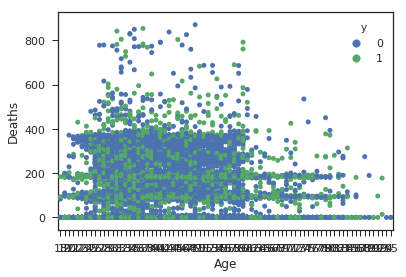

In [48]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


sns.stripplot('age', 
           'pdays', 
           data=data1,  
           hue="y") 

plt.xlabel('Age')


plt.ylabel('Deaths')